# Análise de Dados: exportações de Minas Gerais à China entre 2018 e 2022

#### # Importando módulos

In [830]:
import seaborn as sns  
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

#### # Conectando ao MySQL

In [831]:
dados = mysql.connector.connect(host="localhost", user="root", passwd="Anhanga123@", database="exportacao")
print(dados)

## Passo I: Importando a base de dados

In [832]:
meu_cursor = dados.cursor()
meu_cursor.execute('SELECT * FROM exportacao_brasil_a_china')
dados_importados = meu_cursor.fetchall()
exp_china = pd.DataFrame(dados_importados)
exp_china.head(1)

pib_mg = pd.read_excel('dados/PIB_MinasGerais.xlsx')

## Passo II: Tratando e entendendo a base de dados 

In [833]:
exp_china.dtypes

0     int64
1     int64
2    object
3    object
4     int64
5     int64
6     int64
7     int64
8     int64
dtype: object

In [834]:
exp_china.shape

(976, 9)

In [835]:
exp_china.isnull().sum().sum()

0

In [836]:
exp_china.drop(exp_china[[0, 1]], axis = 1, inplace=True)

In [837]:
novo_nome = {2:'Produto', 3:'UF', 4:'2022 Valor US$', 5:'2021 Valor US$', 6:'2020 Valor US$', 7:'2019 Valor US$', 8:'2018 Valor US$'}

In [838]:
exp_china.rename(columns = novo_nome, inplace=True)

In [839]:
exp_china.head(1)

,Produto,UF,2022 Valor US$,2021 Valor US$,2020 Valor US$,2019 Valor US$,2018 Valor US$
0,"Petróleo, produtos petrolíferos e materiais re...",Rio de Janeiro,13863409190,11937580432,9544732092,13176608181,10704370841


In [840]:
exp_china.Produto.unique()

array(['Petróleo, produtos petrolíferos e materiais relacionados',
       'Minérios metálicos e sucata', 'Sementes e frutos oleaginosos',
       'Carne e preparações de carne',
       'Açúcares, preparações de açúcar e mel', 'Ferro e aço',
       'Celulose e resíduos de papel',
       'Fibras têxteis(exc. tops de lã e outra lã penteada)e seus resíduos(não transformados em fios/tecido)',
       'Tabaco e suas manufaturas',
       'Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas',
       'Gorduras e óleos vegetais, em bruto, refinados ou fracionados',
       'Cereais e preparações de cereais',
       'Produtos farmacêuticos e medicinais ',
       'Máquinas em geral e equipamentos industriais, n.e.p., e peças de máquinas, n.e.p.',
       'Produtos químicos orgânicos', 'Cortiça e madeira',
       'Vegetais e frutas', 'Produtos químicos inorgânicos',
       'Máquinas e equipamentos de geração de energia',
       'Couro, couro, n.e.p., e peles finas 

In [841]:
exp_china.UF.unique()

array(['Rio de Janeiro', 'Pará', 'Minas Gerais', 'Mato Grosso', 'Goiás',
       'Rio Grande do Sul', 'São Paulo', 'Paraná', 'Bahia',
       'Mato Grosso do Sul', 'Maranhão', 'Tocantins', 'Santa Catarina',
       'Piauí', 'Rondônia', 'Espírito Santo', 'Não Declarada',
       'Distrito Federal', 'Amazonas', 'Alagoas', 'Pernambuco', 'Roraima',
       'Amapá', 'Ceará', 'Paraíba', 'Rio Grande do Norte', 'Sergipe',
       'Acre', 'Reexportação'], dtype=object)

## Passo III: Analisando e visualizando os dados

In [842]:
serie_anual_br = exp_china.drop(['Produto', 'UF'], axis = 1)
serie_anual_br = pd.DataFrame(serie_anual_br.sum())
serie_anual_br.rename(columns={0:'Soma anual'}, inplace = True)
serie_anual_br.columns.name = 'Ano'
serie_anual_br

Ano,Soma anual
2022 Valor US$,89427761284
2021 Valor US$,87907887856
2020 Valor US$,67788075211
2019 Valor US$,63357523149
2018 Valor US$,63929563241


##### # Definindo uma função para criar um gráfico de linha de série temporal 

In [843]:
def serie_temporal_exportacao(base_dados, eixo_x, eixo_y, titulo, titulo_x, titulo_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = eixo_x, y = eixo_y, data=base_dados)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, fontsize = 18)
    ax.set_xlabel(titulo_x, fontsize = 14)
    ax.set_ylabel(titulo_y, fontsize = 14)
    ax = ax
    

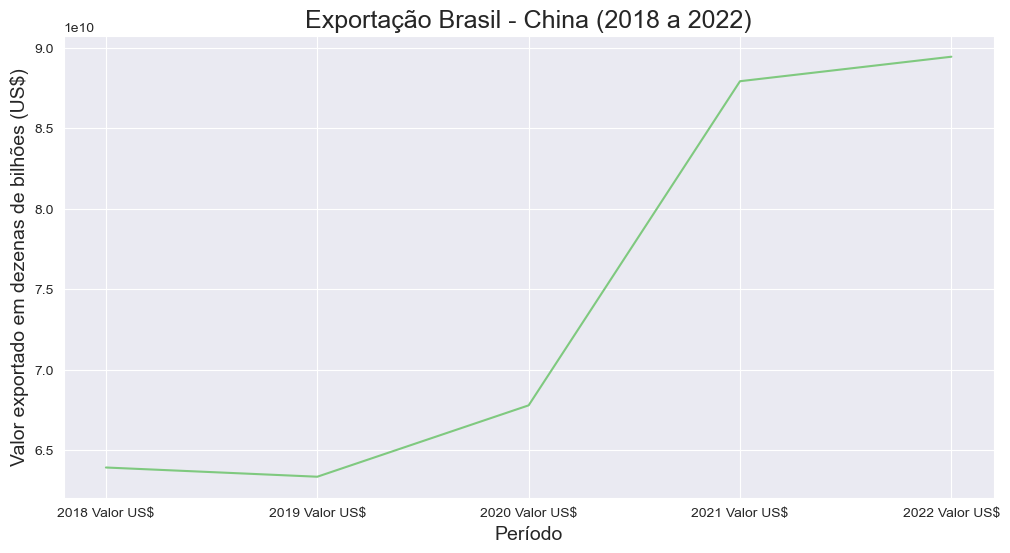

In [844]:
serie_temporal_exportacao(serie_anual_br, serie_anual_br.index, 'Soma anual', 'Exportação Brasil - China (2018 a 2022)', 'Período', 'Valor exportado em dezenas de bilhões (US$)')

### Obervação I: Houve um crescimento de quase 30 bilhões de dólares da exportação do Brasil a China de 2018 a 2022.

In [845]:
mg = exp_china['UF'] == 'Minas Gerais'
exportacao_mg = exp_china[mg]
exportacao_mg = exportacao_mg.drop('UF', axis=1)
exportacao_mg.head(1)

,Produto,2022 Valor US$,2021 Valor US$,2020 Valor US$,2019 Valor US$,2018 Valor US$
2,Minérios metálicos e sucata,8477051989,11949456161,6933056636,4863314083,4283283796


In [846]:
serie_anual_mg = exportacao_mg.drop(['Produto'], axis = 1)
serie_anual_mg = pd.DataFrame(serie_anual_mg.sum())
serie_anual_mg.rename(columns={0:'Soma anual'}, inplace = True)
serie_anual_mg.columns.name = 'Ano'
serie_anual_mg

Ano,Soma anual
2022 Valor US$,14433171342
2021 Valor US$,15912985966
2020 Valor US$,10416098780
2019 Valor US$,7745602831
2018 Valor US$,7032767702


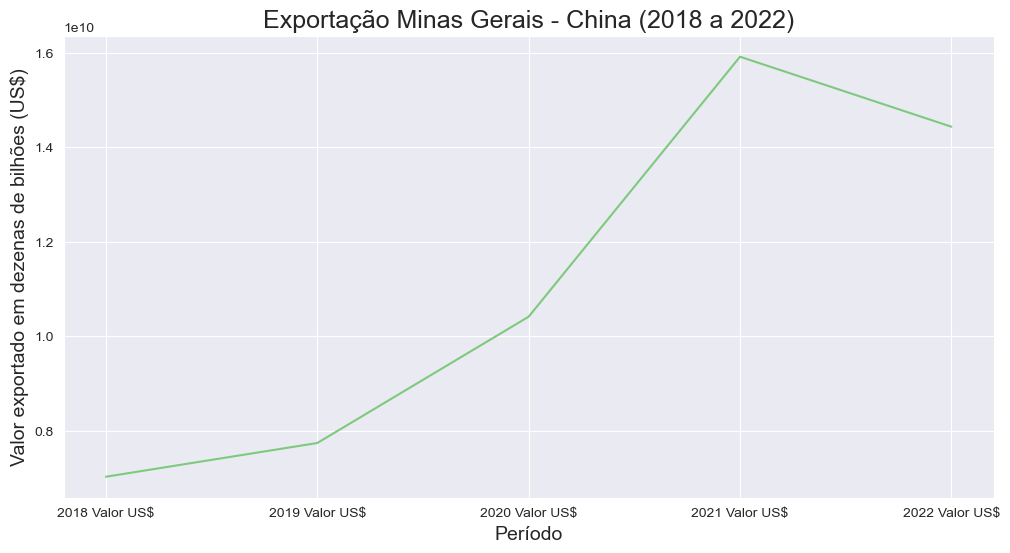

In [847]:
serie_temporal_exportacao(serie_anual_mg, serie_anual_mg.index, 'Soma anual', 'Exportação Minas Gerais - China (2018 a 2022)', 'Período', 'Valor exportado em dezenas de bilhões (US$)')

### Observação II: A exportaçao de Minas Gerais a China caiu praticamente dobrou e de 2018 a 2022, ainda que tenha uma pequena queda de 2021 para 2022 de quase 2 bilhões. 

In [848]:
exportacao_mg = exportacao_mg.set_index('Produto')
exportacao_mg = exportacao_mg.transpose()
exportacao_mg

Produto,Minérios metálicos e sucata,Sementes e frutos oleaginosos,Carne e preparações de carne,Ferro e aço,"Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas","Açúcares, preparações de açúcar e mel",Celulose e resíduos de papel,Produtos químicos inorgânicos,"Café, chá, cacau, especiarias, e respectivos produtos",Outro material de transporte,...,Plásticos em formas não primárias,Alimentos para animais (não incluindo cereais não moídos),"Fios Têxteis, tecidos, artigos confeccionados, n.e.p. e produtos relacionados","Artigos de viagem, bolsas e artefatos semelhantes","Móveis e suas partes; roupas de cama, colchões, suportes de colchão, almofadas e semelhantes",Borracha em bruto (incluindo sintética e reconstituída),"Petróleo, produtos petrolíferos e materiais relacionados","Papel, cartão e artigos de pasta de celulose, de papel ou de cartão",Operações especiais e commodities não classificadas de acordo com o tipo,Laticínios e ovos de aves
2022 Valor US$,8477051989,2794089470,1155434589,820146516,376736247,272796163,261468998,90894178,71531968,33001635,...,739,578,436,405,289,62,0,0,0,0
2021 Valor US$,11949456161,1649120783,574786837,895274301,111948392,266218344,173980750,34567098,45802080,104400000,...,52610,1412629,9502,4956,29223,2854,1458,0,0,0
2020 Valor US$,6933056636,1227908799,602335104,1117585788,52650076,228179991,170021594,5277132,22326903,45,...,4012,625517,763028,2414,1937,44,2397492,0,0,0
2019 Valor US$,4863314083,911662205,681772349,831516036,55401579,91448053,208006782,4711812,20567497,89255,...,5698,737739,2322,3439,339,44,0,206,0,0
2018 Valor US$,4283283796,1296891202,406917011,621174311,47536163,29645957,223726021,6355277,18317183,0,...,166,2075757,2718,356,0,567,0,55,198636,267


C:\Users\User\AppData\Local\Temp\ipykernel_8600\3455694008.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


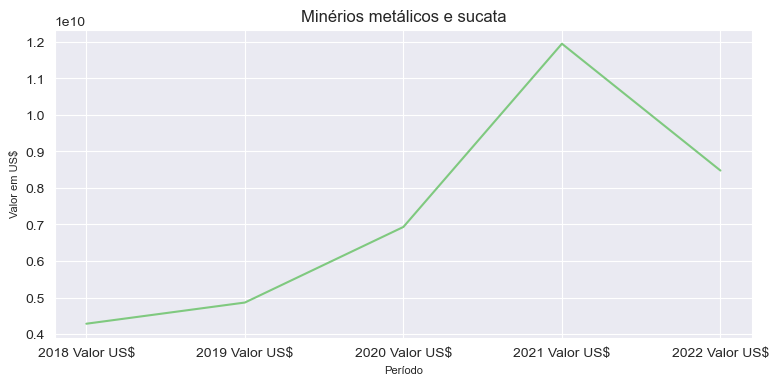

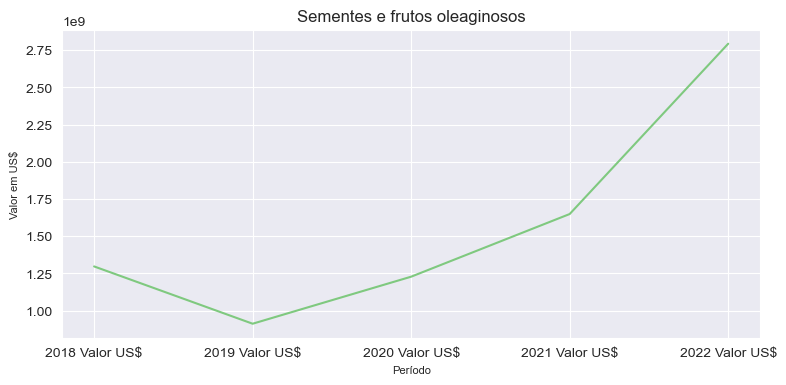

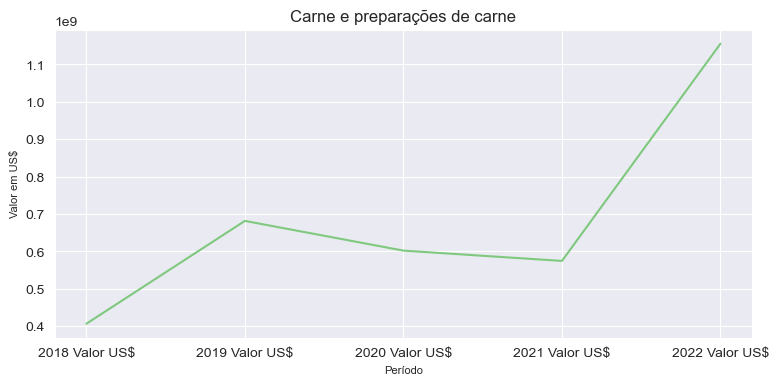

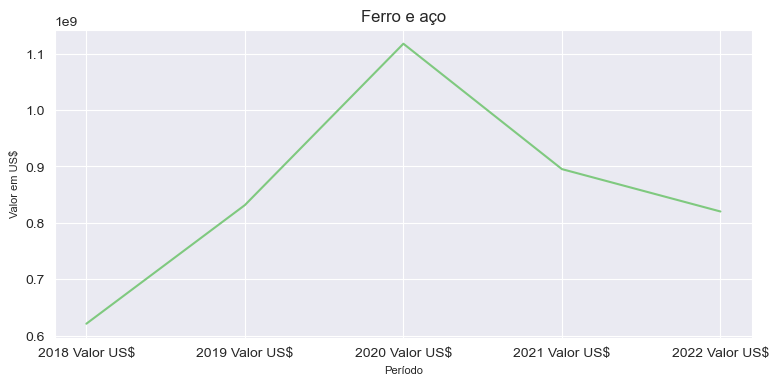

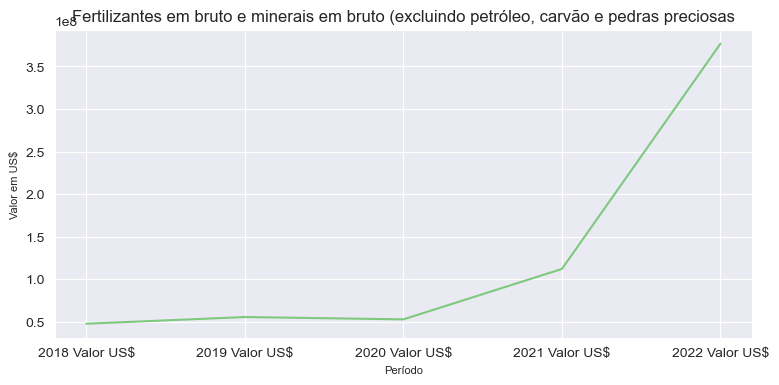

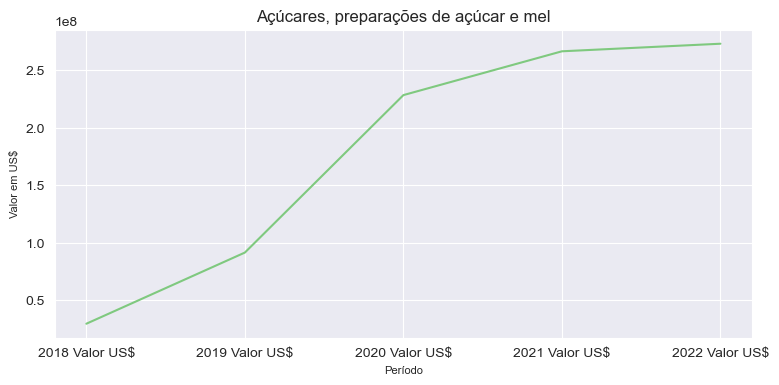

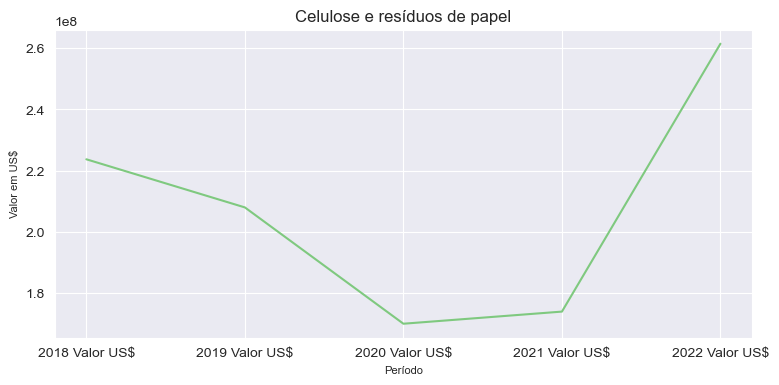

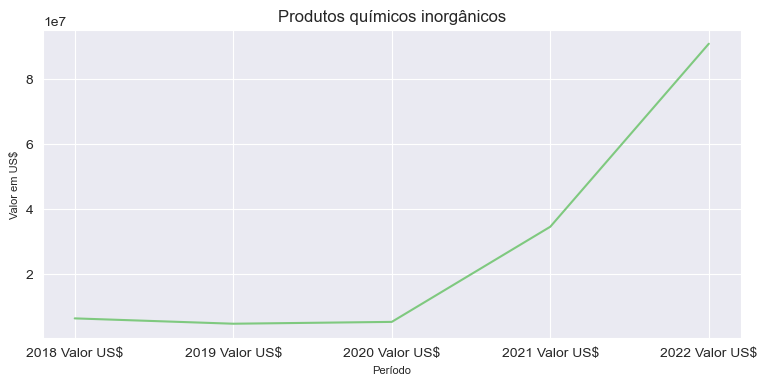

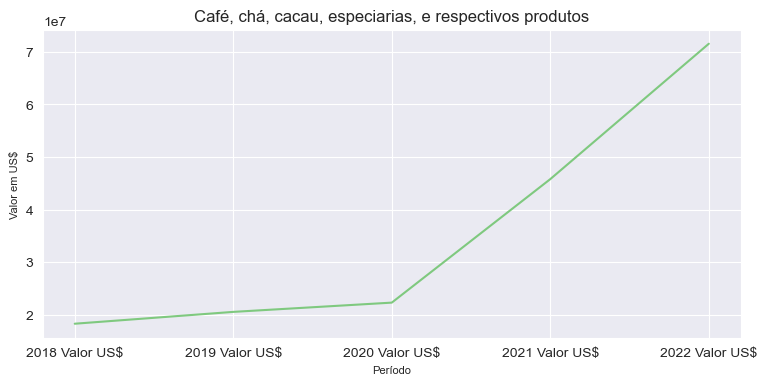

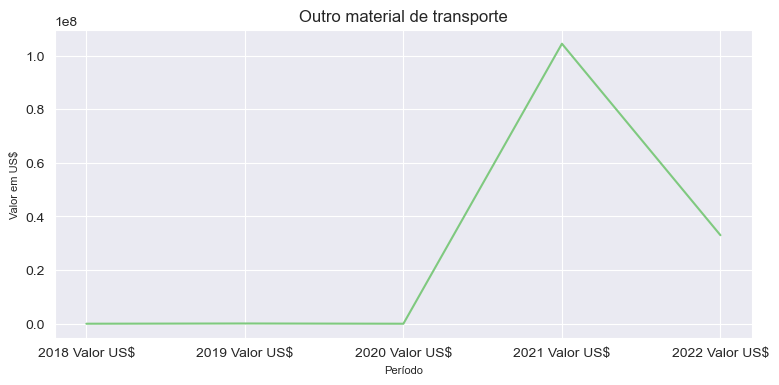

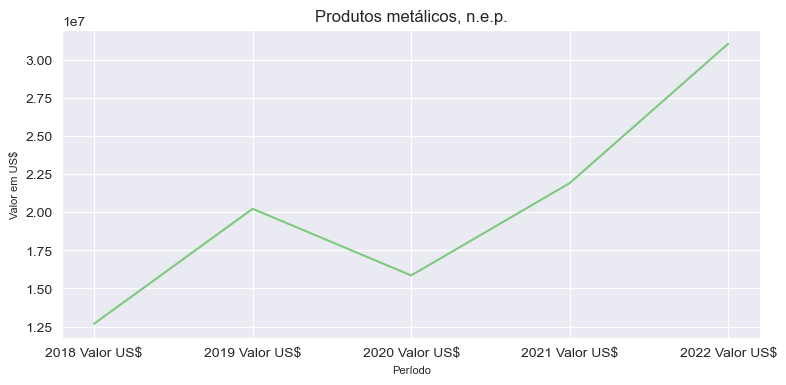

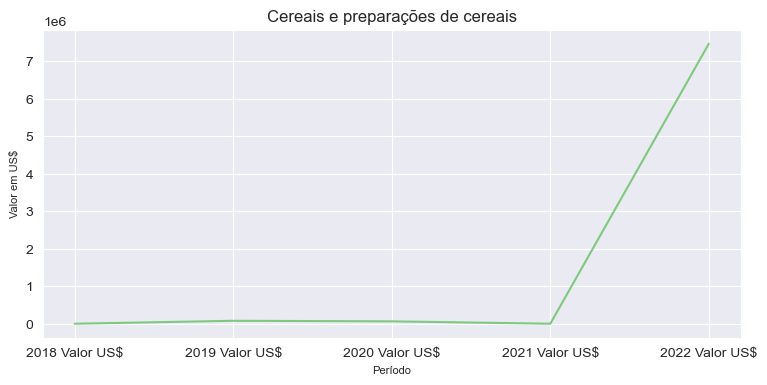

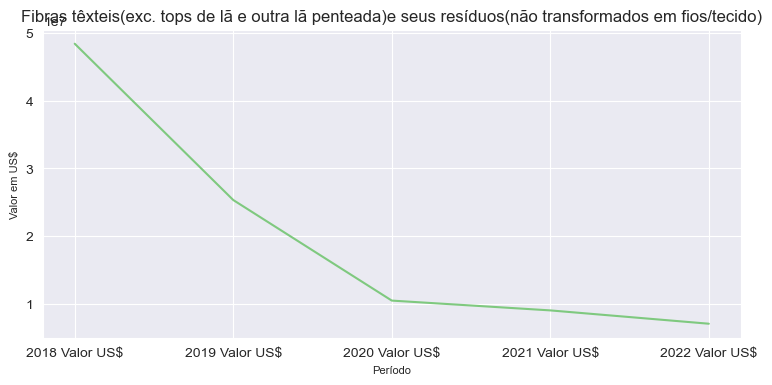

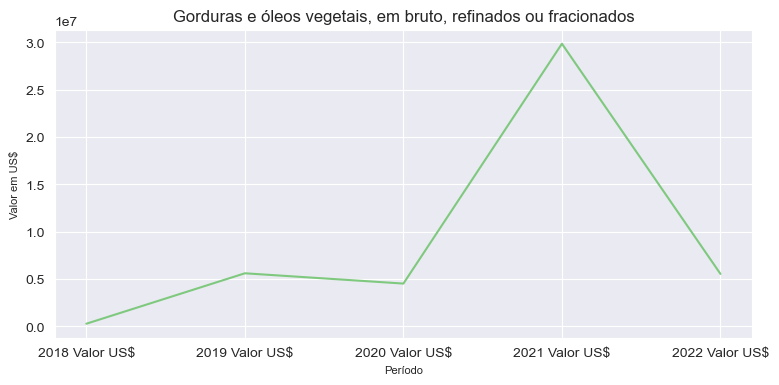

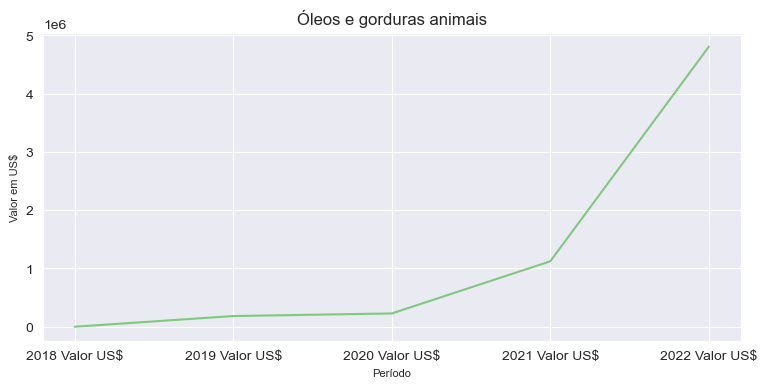

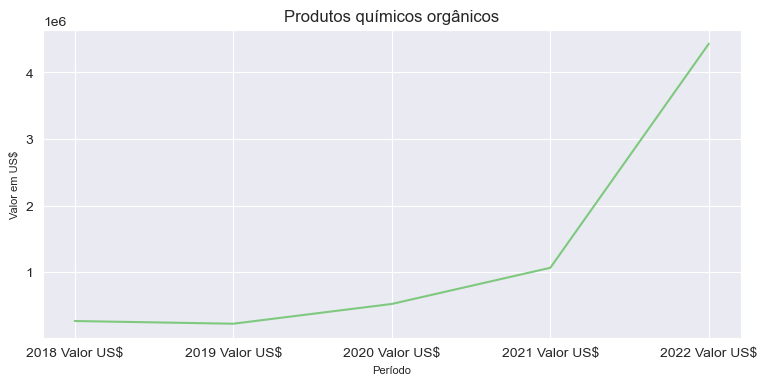

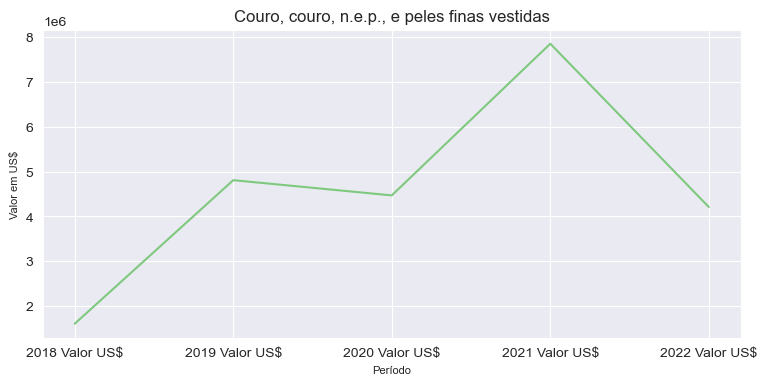

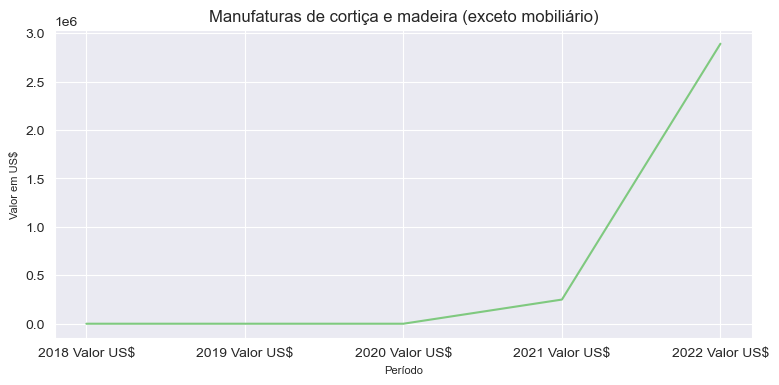

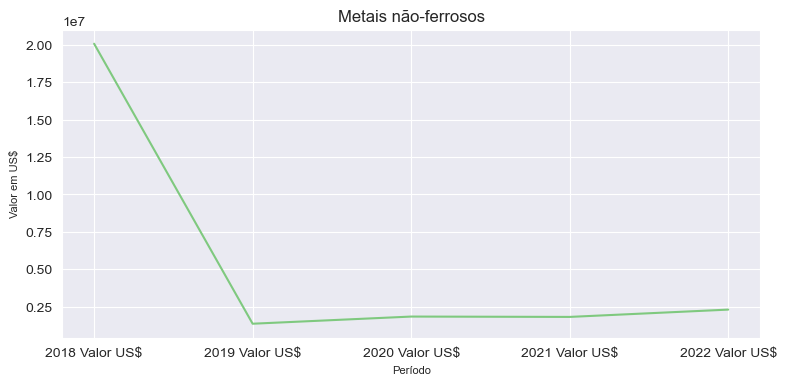

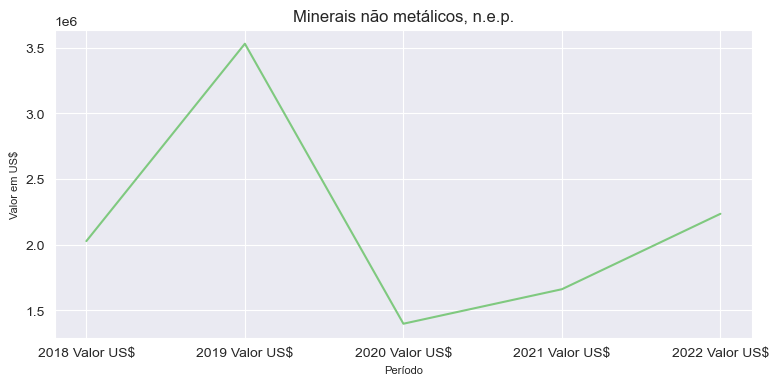

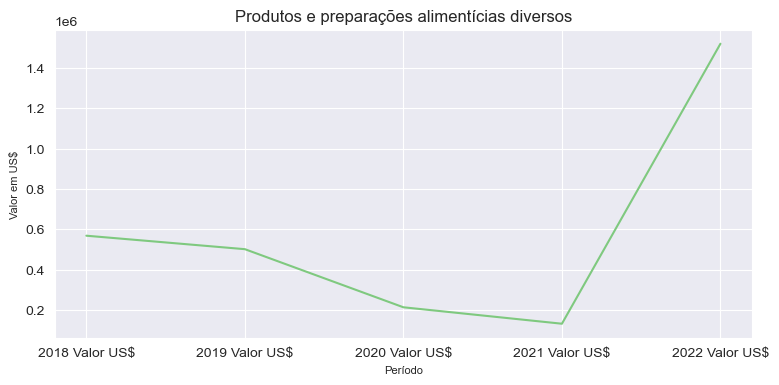

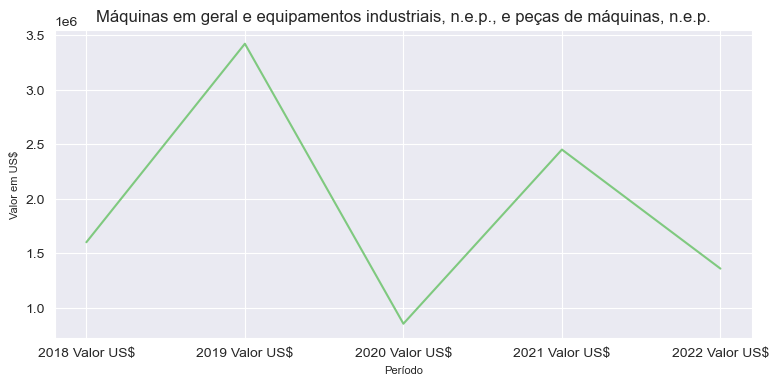

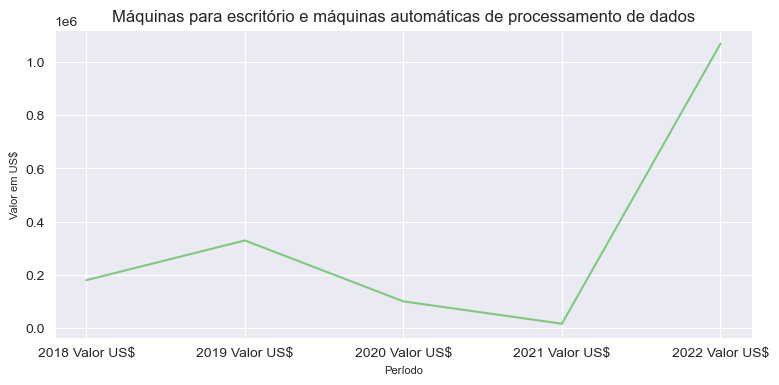

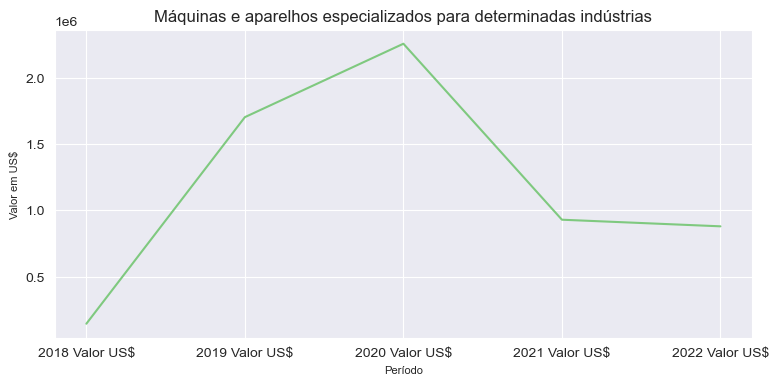

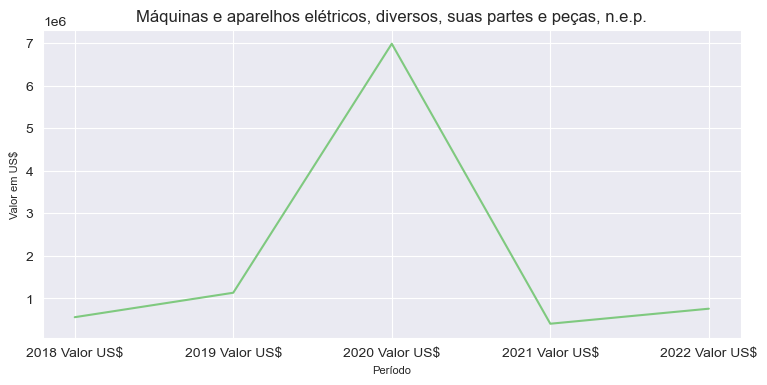

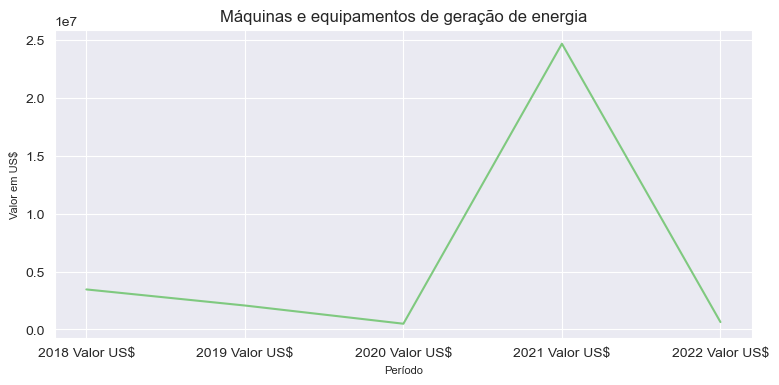

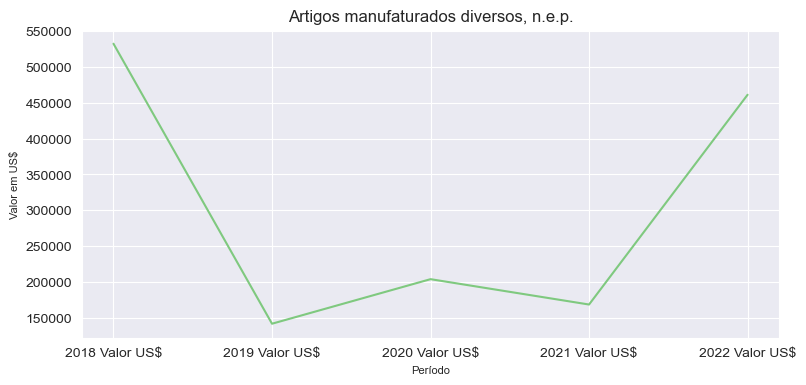

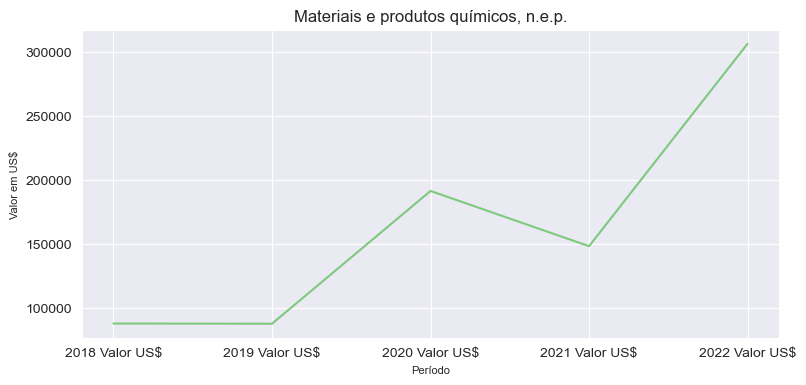

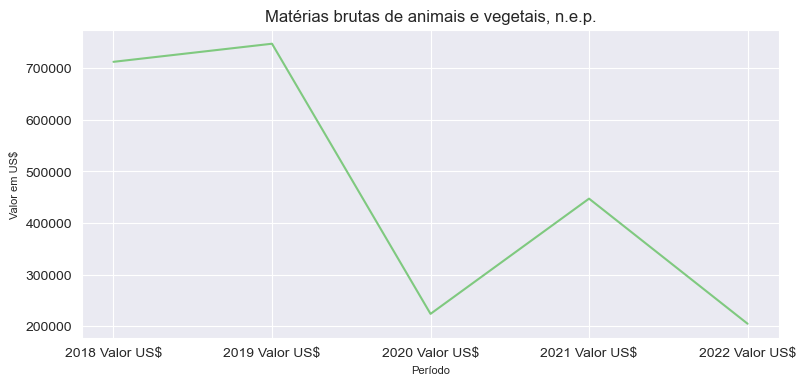

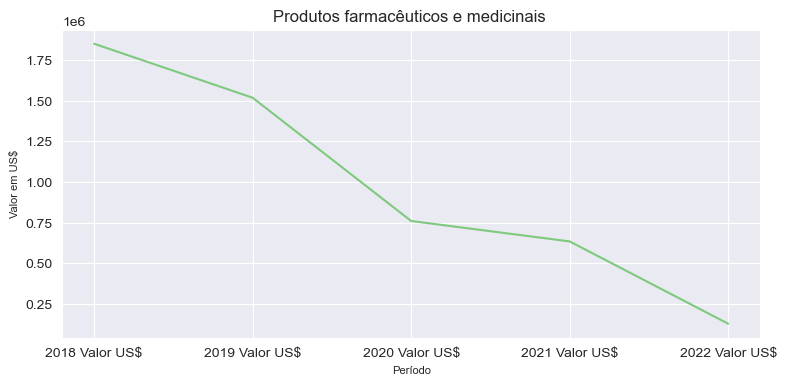

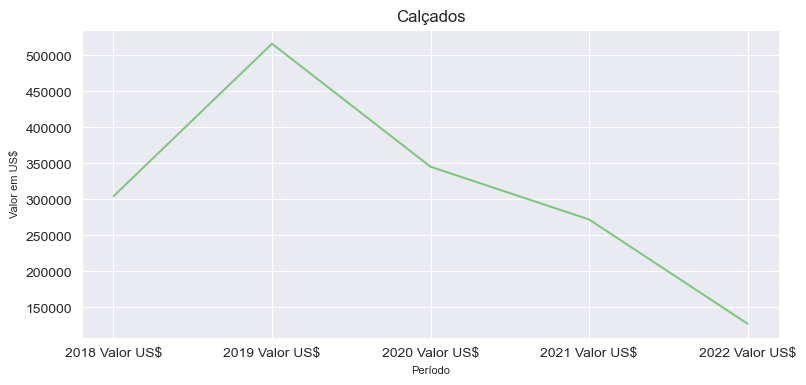

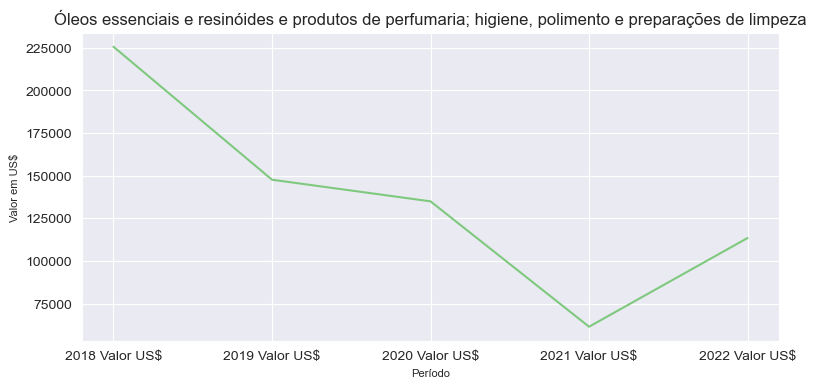

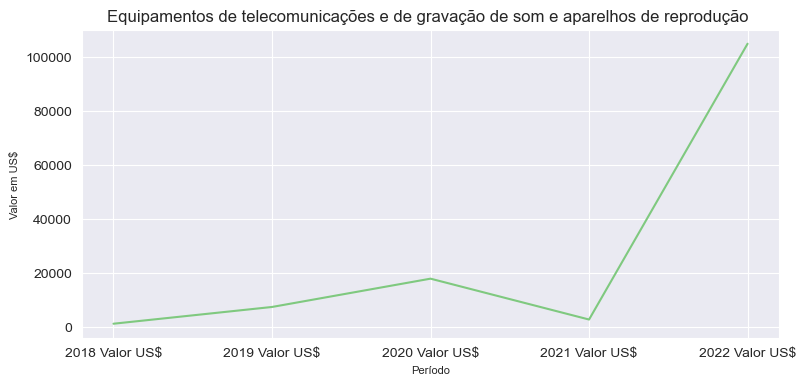

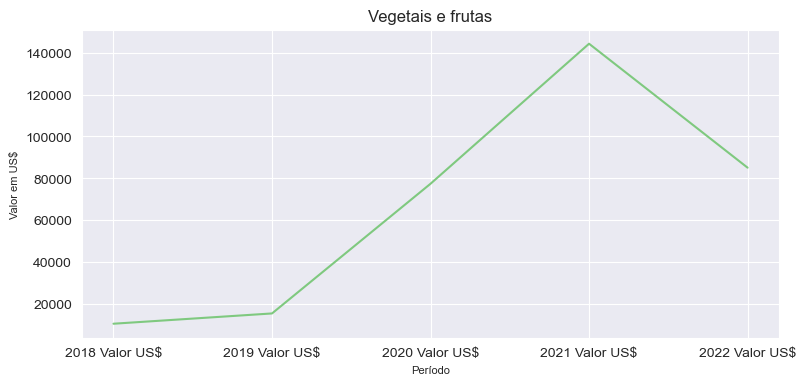

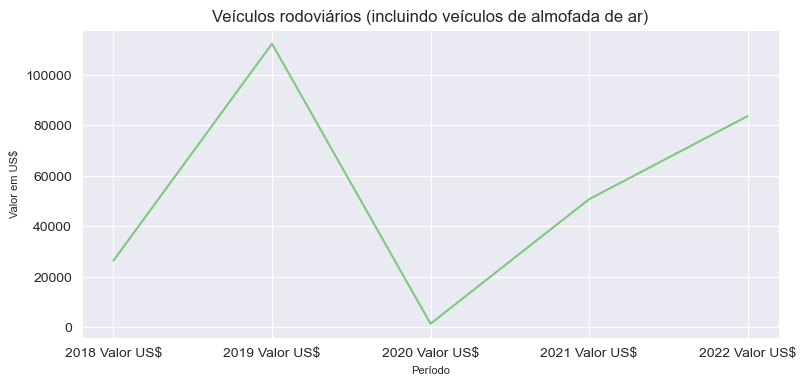

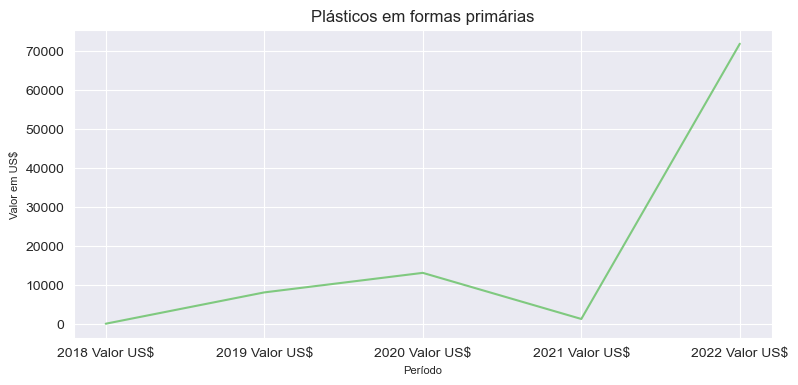

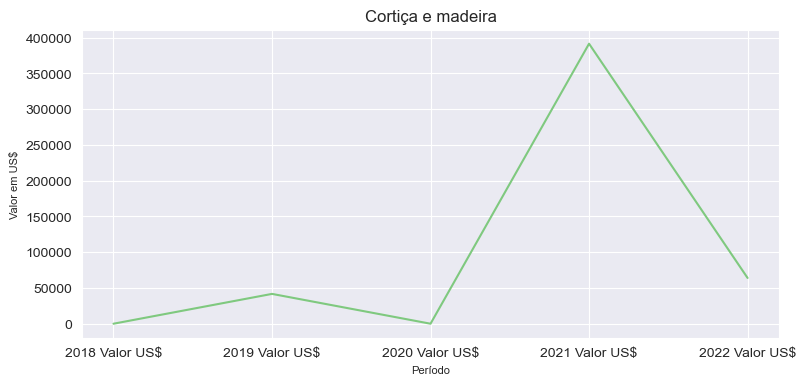

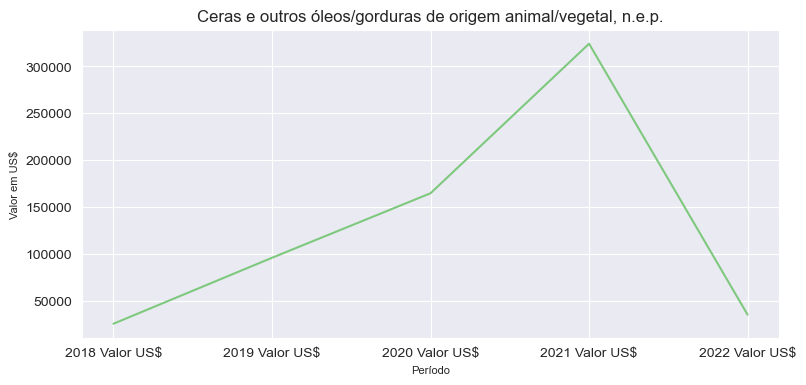

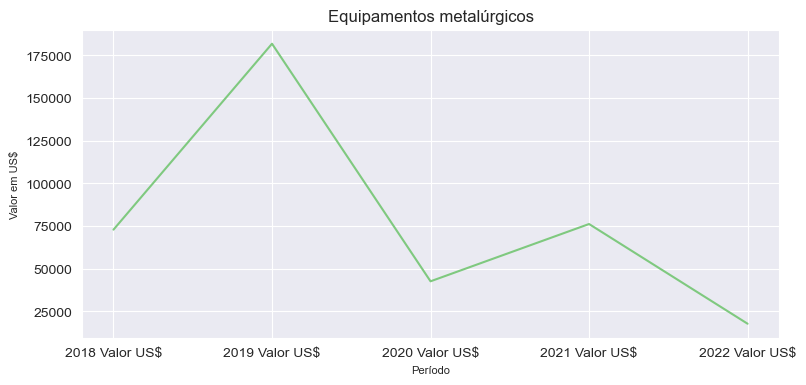

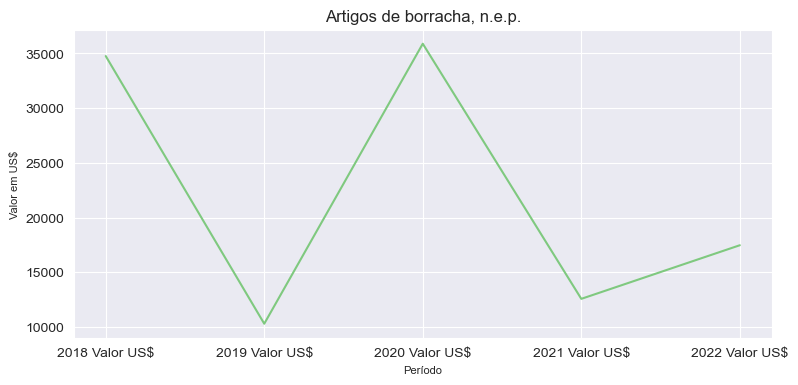

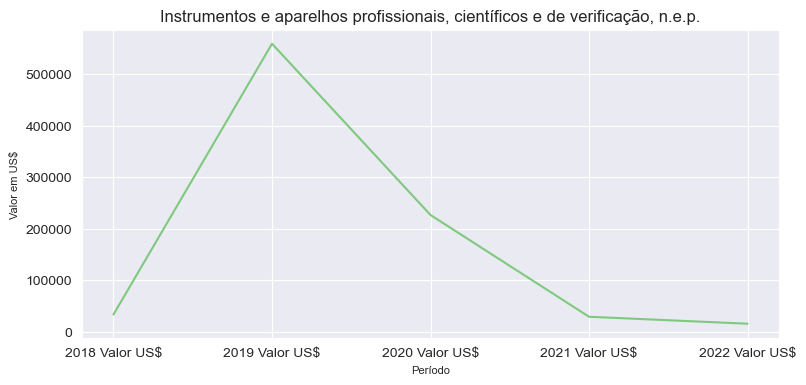

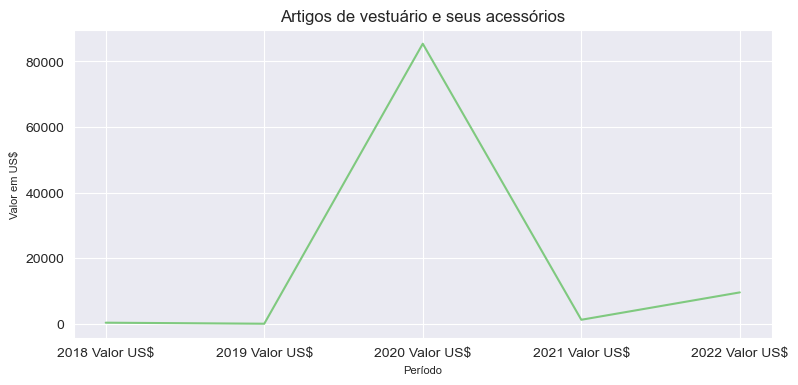

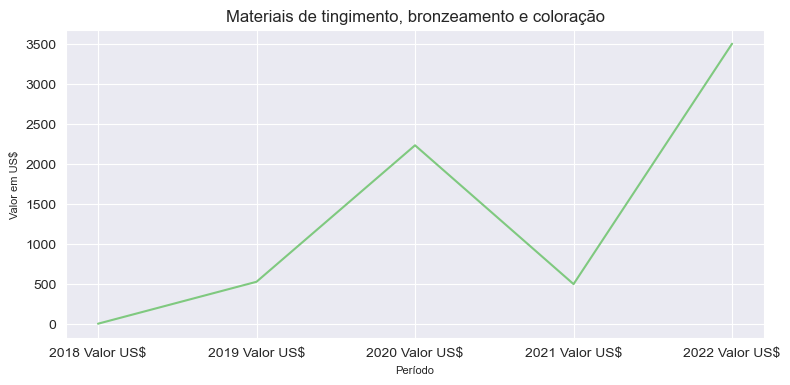

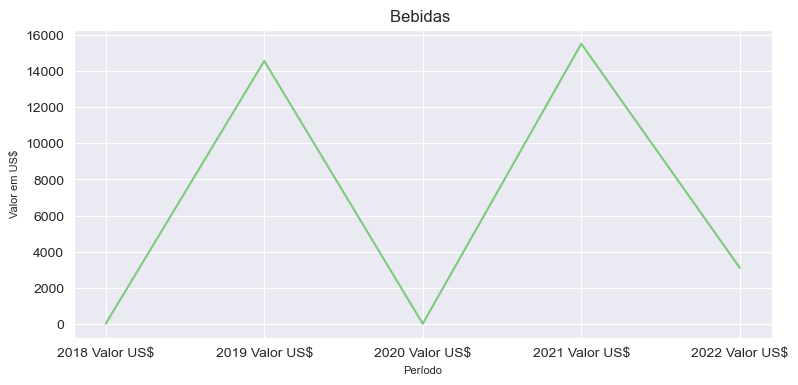

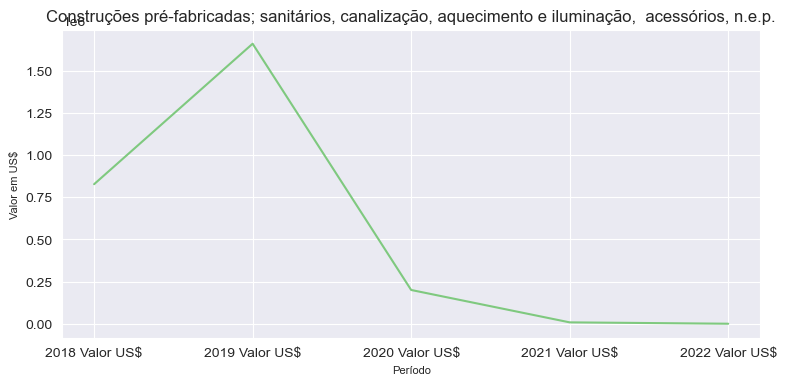

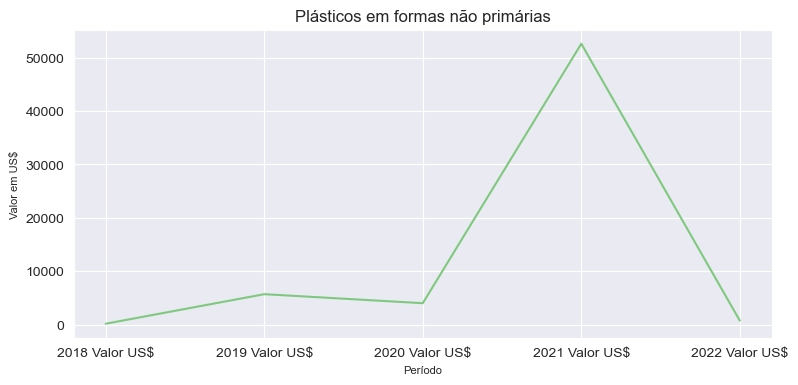

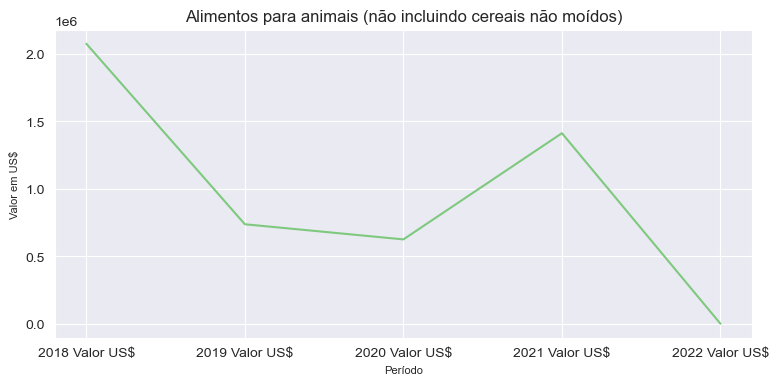

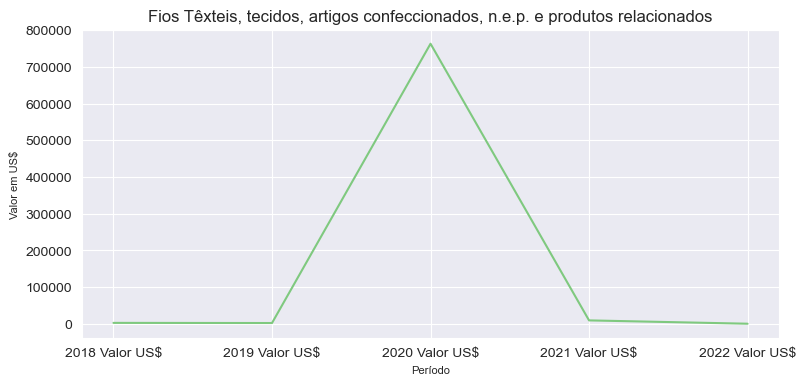

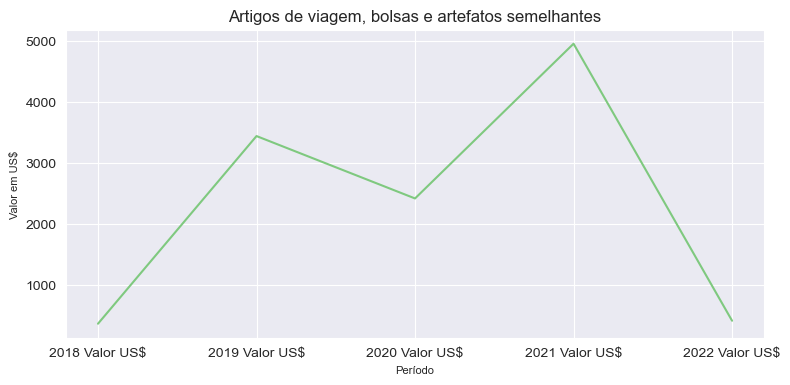

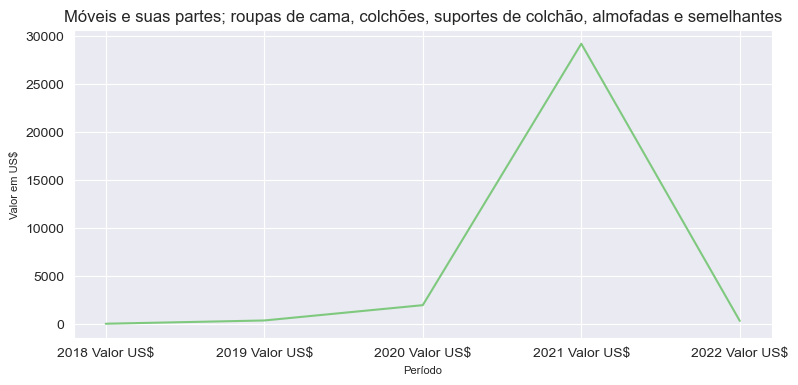

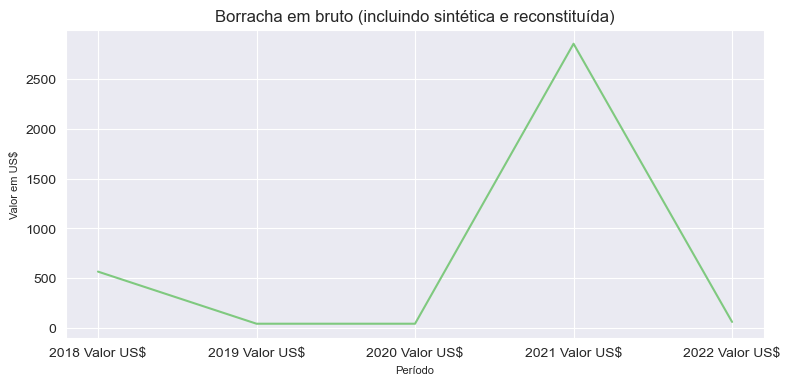

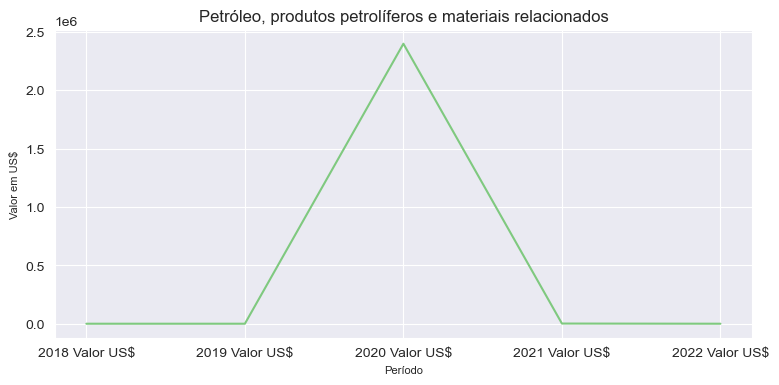

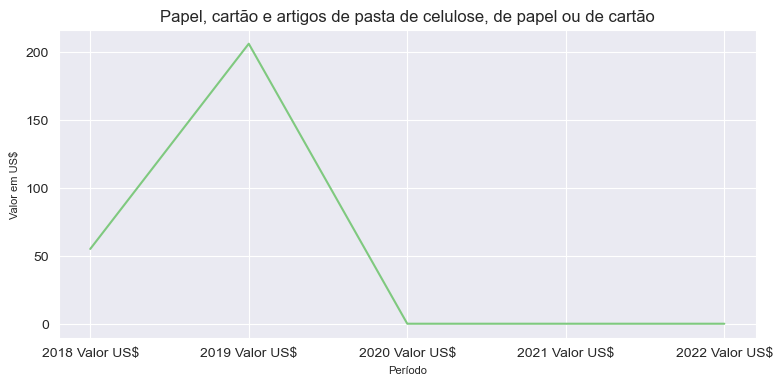

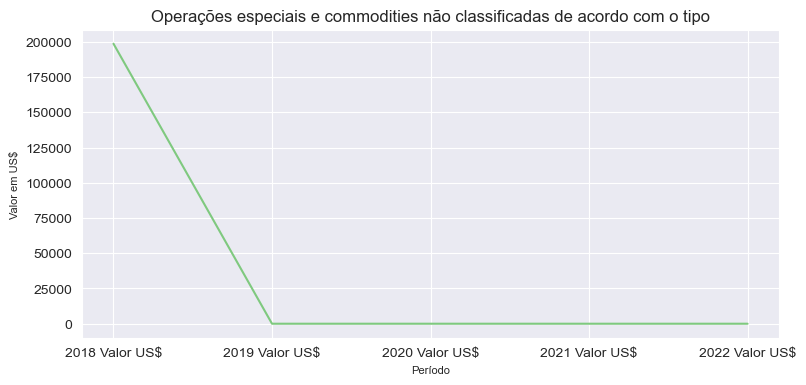

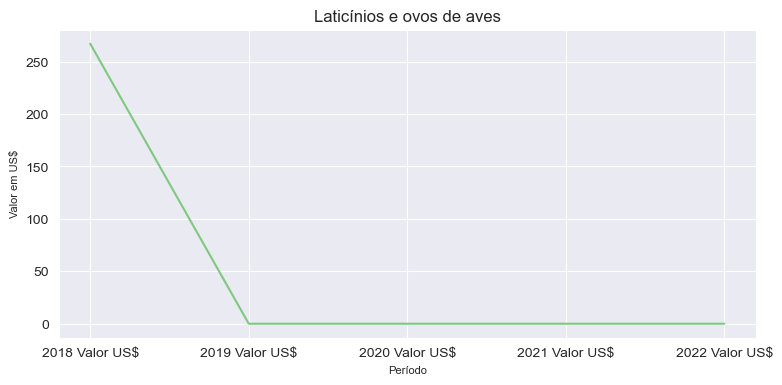

<Figure size 640x480 with 0 Axes>

In [849]:
for coluna in exportacao_mg.columns:
    ax=sns.lineplot(data=exportacao_mg[coluna])
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(9,4)
    ax.set_title(coluna, fontsize = 12)
    ax.set_xlabel('Período', fontsize = 8)
    ax.set_ylabel('Valor em US$', fontsize = 8)
    plt.figure()

### Observação III: do início ao final do período houve um aumento da exportação dos principais produtos exportadaos por MG, porém nos produtos de menor importância em termos de volume de exportação, não pode ser observado uma têdencia predominante de queda ou aumento. 

In [850]:
exportacao_mg = exportacao_mg.transpose()
top_5_produtos_2022 = exportacao_mg[0:5]['2022 Valor US$'].sum()
top_5_produtos_2022

13623458811

In [851]:
total_mg_2022 = exportacao_mg['2022 Valor US$'].sum()
total_mg_2022

14433171342

In [852]:
porcentagem_principais_produtos = ((top_5_produtos_2022/total_mg_2022)*100).round(2)
print(f"Os 5 principais produtos exportados de MG à China equivalem a {porcentagem_principais_produtos}% das exportações totais em 2022.")

Os 5 principais produtos exportados de MG à China equivalem a 94.39% das exportações totais em 2022.


### Observação IV: A perenidade dos produtos que não fazem parte dos 5 principais produtos exportados por Minas Gerais não tem grande impacto, como observado pelos gráficos, no volume total porque os 5 principais equivalem a 94,39% das exportações totais, levendo em conta dados de 2022. 

In [853]:
print('Os 5 principais produtos são:')
exportacao_mg.head(5)

Os 5 principais produtos são:


,2022 Valor US$,2021 Valor US$,2020 Valor US$,2019 Valor US$,2018 Valor US$
Produto,,,,,
Minérios metálicos e sucata,8477051989,11949456161,6933056636,4863314083,4283283796
Sementes e frutos oleaginosos,2794089470,1649120783,1227908799,911662205,1296891202
Carne e preparações de carne,1155434589,574786837,602335104,681772349,406917011
Ferro e aço,820146516,895274301,1117585788,831516036,621174311
"Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas",376736247,111948392,52650076,55401579,47536163


### Observação V: São produtos de baixo valor agregado sendo, principalmente, do setor de mineração, seguido pelo agrícola. 

In [854]:
serie_anual_br

Ano,Soma anual
2022 Valor US$,89427761284
2021 Valor US$,87907887856
2020 Valor US$,67788075211
2019 Valor US$,63357523149
2018 Valor US$,63929563241


In [855]:
serie_anual_mg

Ano,Soma anual
2022 Valor US$,14433171342
2021 Valor US$,15912985966
2020 Valor US$,10416098780
2019 Valor US$,7745602831
2018 Valor US$,7032767702


##### # Criando uma função para criar as porcentagens e colocá-las em uma lista para poder usar nos gráficos de pizza 

In [856]:
def criando_porcentagem(referencia_1, referencia_2):
    divisao = referencia_2/referencia_1
    lista_porcentagem = []
    for valor in divisao:
        lista_porcentagem.append(int((valor)*100))
    lista_porcentagem = lista_porcentagem[::-1]    
    print(lista_porcentagem)

In [857]:
criando_porcentagem(serie_anual_br['Soma anual'], serie_anual_mg['Soma anual'])

[11, 12, 15, 18, 16]


##### # Criando gráficos de pizza em sequência por ano

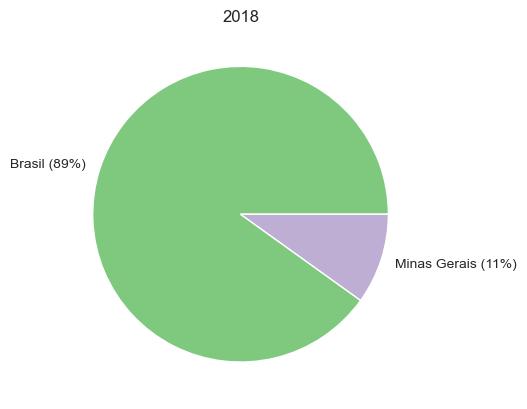

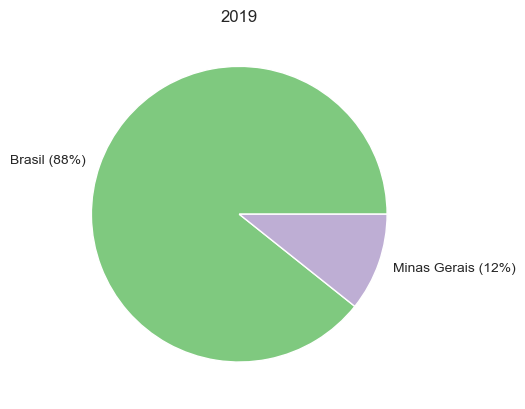

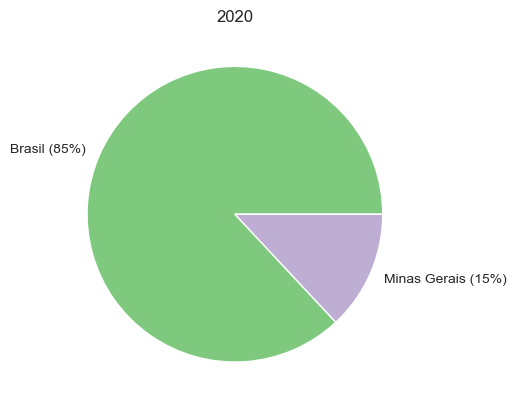

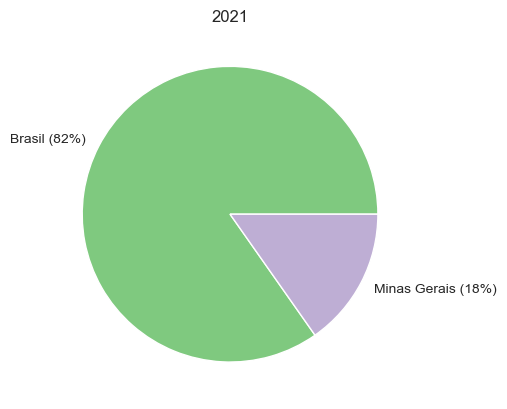

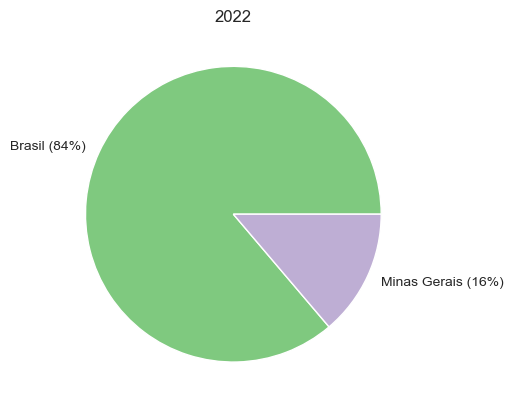

<Figure size 640x480 with 0 Axes>

In [858]:
data = 2018 - 1
for valor in [11, 12, 15, 18, 16]:
    data += 1
    plt.title(data, fontsize = 12)
    mylabels = [f"Brasil ({100 - valor}%)", f"Minas Gerais ({valor}%)"]
    x = (np.array([100, + valor]))
    plt.pie(x, labels = mylabels)
    plt.figure() 

### Observação VI: A partifipação de Minas Gerais na exportação brasileira à China vem crescendo ao logo dos últimos anos. 

In [859]:
top_5_produtos = exportacao_mg[0:5]
top_5_produtos

,2022 Valor US$,2021 Valor US$,2020 Valor US$,2019 Valor US$,2018 Valor US$
Produto,,,,,
Minérios metálicos e sucata,8477051989,11949456161,6933056636,4863314083,4283283796
Sementes e frutos oleaginosos,2794089470,1649120783,1227908799,911662205,1296891202
Carne e preparações de carne,1155434589,574786837,602335104,681772349,406917011
Ferro e aço,820146516,895274301,1117585788,831516036,621174311
"Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas",376736247,111948392,52650076,55401579,47536163


In [860]:
minerios_metalicos_sucata = top_5_produtos[0:1].transpose()[::-1]
sementes_frutos_oleaginosos = top_5_produtos[1:2].transpose()[::-1]
carne_preparacoes_carne = top_5_produtos[2:3].transpose()[::-1]
ferro_aco = top_5_produtos[3:4].transpose()[::-1]
fertilizantes_minerais_bruto = top_5_produtos[4:5].transpose()[::-1]

In [861]:
minerios_metalicos_sucata['aumento'] = minerios_metalicos_sucata['Minérios metálicos e sucata'].diff()
minerios_metalicos_sucata['aceleracao'] = minerios_metalicos_sucata['aumento'].diff()

sementes_frutos_oleaginosos['aumento'] = sementes_frutos_oleaginosos['Sementes e frutos oleaginosos'].diff()
sementes_frutos_oleaginosos['aceleracao'] = sementes_frutos_oleaginosos['aumento'].diff()

carne_preparacoes_carne['aumento'] = carne_preparacoes_carne['Carne e preparações de carne'].diff()
carne_preparacoes_carne['aceleracao'] = carne_preparacoes_carne['aumento'].diff()

ferro_aco['aumento'] = ferro_aco['Ferro e aço'].diff()
ferro_aco['aceleracao'] = ferro_aco['aumento'].diff()

fertilizantes_minerais_bruto['aumento'] = fertilizantes_minerais_bruto['Fertilizantes em bruto e minerais em bruto (excluindo petróleo, carvão e pedras preciosas'].diff()
fertilizantes_minerais_bruto['aceleracao'] = fertilizantes_minerais_bruto['aumento'].diff()

#### # Definindo uma função para verificar os crescimento da exportação dos 5 pricipais produtos

In [862]:
minerios_metalicos_sucata

Produto,Minérios metálicos e sucata,aumento,aceleracao
2018 Valor US$,4283283796,NaN,NaN
2019 Valor US$,4863314083,5.800303e+08,NaN
2020 Valor US$,6933056636,2.069743e+09,1.489712e+09
2021 Valor US$,11949456161,5.016400e+09,2.946657e+09
2022 Valor US$,8477051989,-3.472404e+09,-8.488804e+09


In [863]:
def plot_comparacao(x, y1, y2, dataset, titulo):
    plt.figure(figsize=(10,6))
    ax = plt.subplot(2,1,1)
    plt.title(titulo)
    plt.subplot(2,1,1)
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(2,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax=ax

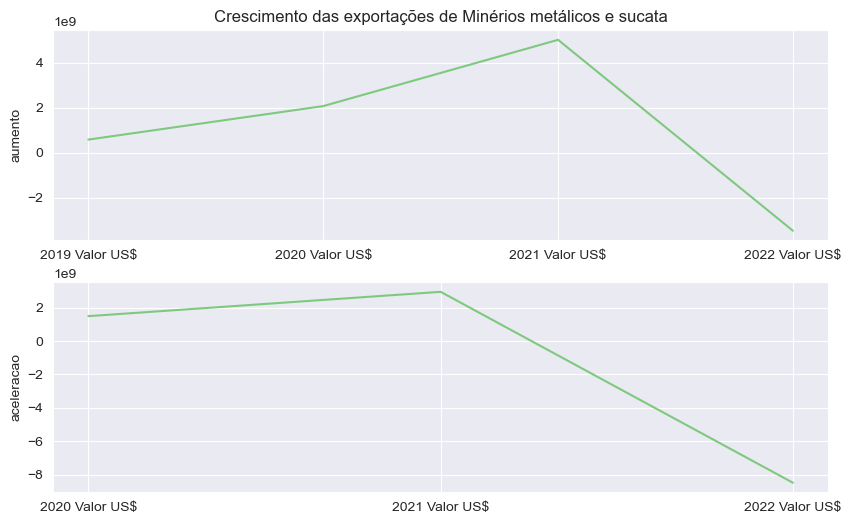

In [864]:
plot_comparacao(minerios_metalicos_sucata.index, 'aumento', 'aceleracao', minerios_metalicos_sucata, 'Crescimento das exportações de Minérios metálicos e sucata')

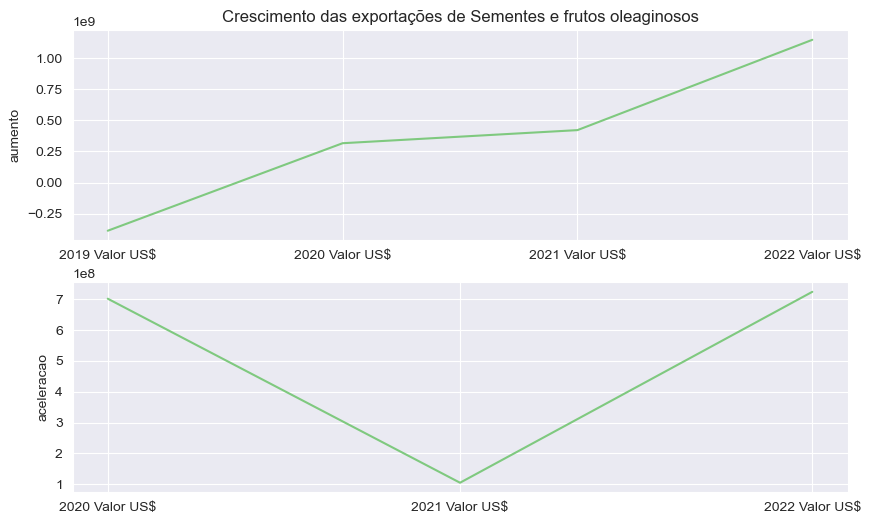

In [865]:
plot_comparacao(sementes_frutos_oleaginosos.index, 'aumento', 'aceleracao', sementes_frutos_oleaginosos, 'Crescimento das exportações de Sementes e frutos oleaginosos')

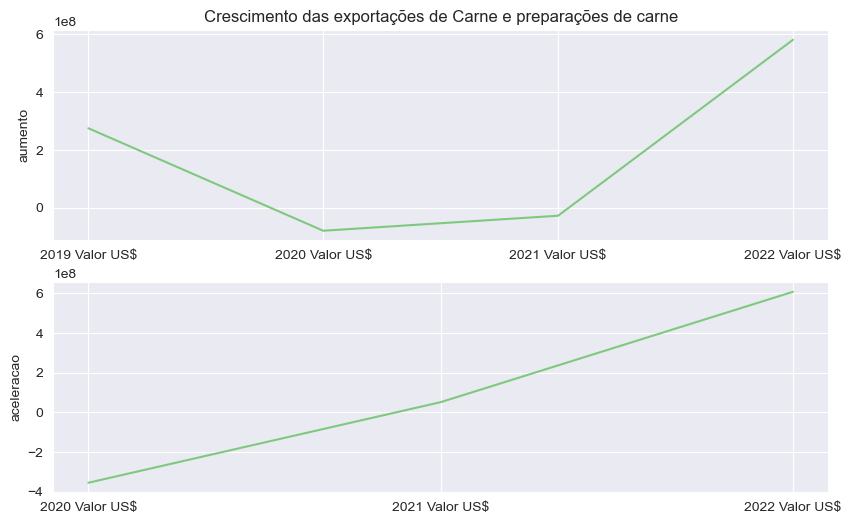

In [866]:
plot_comparacao(carne_preparacoes_carne.index, 'aumento', 'aceleracao', carne_preparacoes_carne, 'Crescimento das exportações de Carne e preparações de carne')

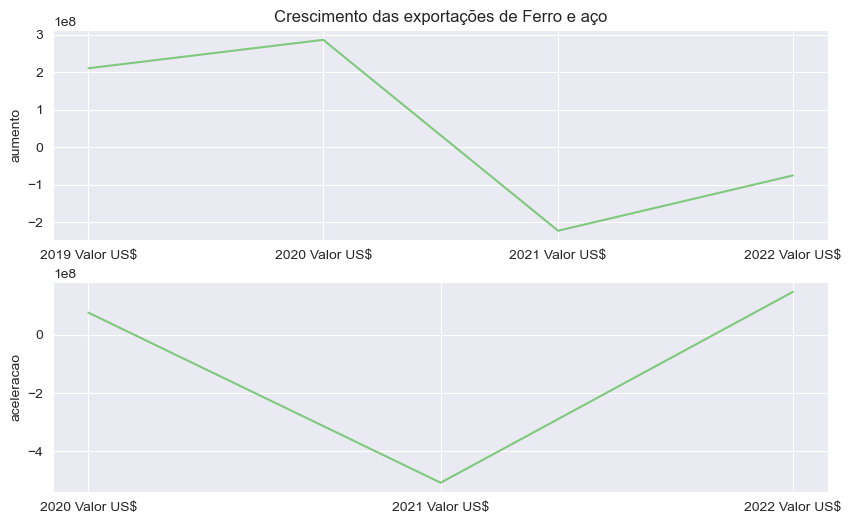

In [867]:
plot_comparacao(ferro_aco.index, 'aumento', 'aceleracao', ferro_aco, 'Crescimento das exportações de Ferro e aço')

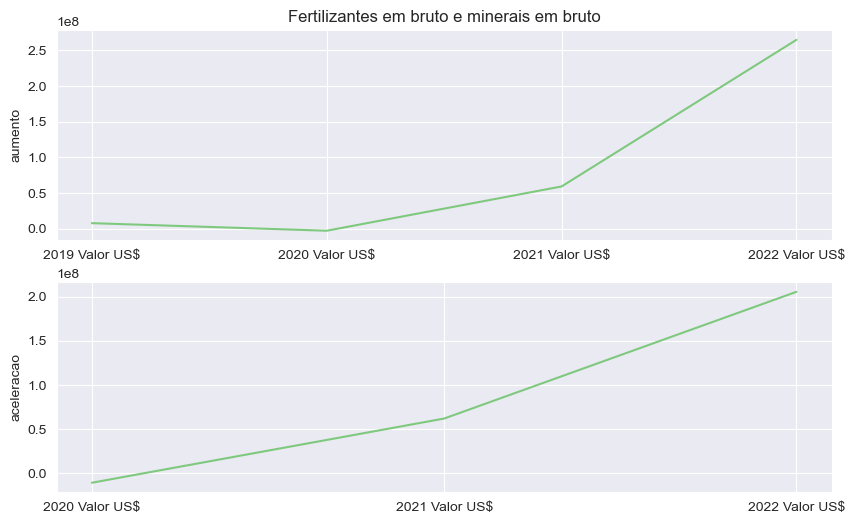

In [868]:
plot_comparacao(fertilizantes_minerais_bruto.index, 'aumento', 'aceleracao', fertilizantes_minerais_bruto, 'Fertilizantes em bruto e minerais em bruto')

### Obersevação: Os dois produtos que apresentaram um crescimento maior e mais acelerado, liderando esse aumento dos últimos anos, foram ''Sementes e frutos oleaginosos'' e ''Fertilizantes em bruto e minerais em bruto( (excluindo petróleo, carvão e pedras preciosas)''. 

In [869]:
pib_mg

,ANO,PIB
0,2022,950800000000
1,2021,805500000000
2,2020,682786000000
3,2019,651870000000
4,2018,614876000000


In [870]:
serie_anual_mg

Ano,Soma anual
2022 Valor US$,14433171342
2021 Valor US$,15912985966
2020 Valor US$,10416098780
2019 Valor US$,7745602831
2018 Valor US$,7032767702


##### #Criando novos dataframes para fazer uma corrrelação entre o crescimento do PIB mineiro e as exportações para a China de 2018 a 2022

In [871]:
exp_mg = pd.DataFrame({
    "Ano":[2018, 2019, 2020, 2021, 2022],
    "Valor exp/PIB":[7032767702, 7745602831, 10416098780, 15912985966, 14433171342]
})

In [872]:
mg_pib = pd.DataFrame({
    "Ano":[2018, 2019, 2020, 2021, 2022],
    "Valor exp/PIB":[614876000000, 651870000000, 682786000000, 8805500000000, 950800000000]
})

In [873]:
correlacao = exp_mg.corrwith(mg_pib, axis = 0)
print("A correlação do crescimento do PIB de MG e as exportações mineiras para a China é de {}, ou seja, uma alta correlação, sendo que 1 seria uma correção perfeita".format(correlacao[1]))

A correlação do crescimento do PIB de MG e as exportações mineiras para a China é de 0.7046466397163994, ou seja, uma alta correlação, sendo que 1 seria uma correção perfeita


### Observação:  Existem uma alta correlação entre o PIB de Minas Gerais e as exportações feitas à China, mostrando a importância desse paceiro comercial para o estado. 